# MNIST_deepFC_Sigmoid

# Setup

## Imports

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

C:\Users\FMISecretariat6\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load Data

In [3]:
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


## Setup Model

Construim o arhitectura cu 5 layere fully connected:

![](images/5-layers.png)

* pt fiecare imagine $28 \times 28$ pixeli, vectorizam in $784$
* conectam outputul de mai sus la un strat cu $200$ noduri si activare sigmoid
* conectam outputul de mai sus la un strat cu $100$ noduri si activare sigmoid
* conectam outputul de mai sus la un strat cu $60$ noduri si activare sigmoid
* conectam outputul de mai sus la un strat cu $30$ noduri si activare sigmoid
* conectam outputul de mai sus la un strat cu $10$ noduri si activare softmax - acesta este clasificatorul / stratul de output

straturile intermediare se numesc "hidden" si folosesc activare sigmoid

In [70]:
batchSize = None;       # put None for right now as we dont know yet

imgHeight = 28
imgWidth = 28
numOfColors = 1         # gray scale images

flatSize = imgHeight*imgWidth*numOfColors   # 728

numberOfClasses = 10    # 10 classes: 0-9

# Size of each layer:
sizeLayerOne = 200
sizeLayerTwo = 100
sizeLayerThree = 70
sizeLayerFour = 30
sizeLayerFive = numberOfClasses       # the final layer is the output layer

Input `X_img`:

In [71]:
# Input Data
X_img = tf.placeholder(tf.float32, [batchSize, imgHeight, imgWidth, numOfColors], name="X_img")
X_vec = tf.reshape(X_img, [-1, 784], name="X_vec")

Placeholdere necesare (GT ground truth values, vectorizate / "one-hot encoding")

In [72]:
Y_True = tf.placeholder(tf.float32, [batchSize, 10])

Definim arhitectura, in termeni de dimensiuni si conexiuni intre W si b

In [73]:
with tf.name_scope("Layer_1"):
    # Weights
    W1 = tf.Variable(tf.truncated_normal([flatSize, sizeLayerOne], stddev=0.1), name="Weights")

    # Biases
    b1 = tf.Variable(tf.zeros([sizeLayerOne]), name="Biases")
    
    # Sigmoid Activation
    Y1 = tf.nn.sigmoid(tf.matmul(X_vec, W1) + b1, name="Activation")

In [74]:
with tf.name_scope("Layer_2"):
    # TODO
    # Weights
    W2 = tf.Variable(tf.truncated_normal([sizeLayerOne, sizeLayerTwo], stddev=0.1), name="Weights2")

    # Biases
    b2 = tf.Variable(tf.zeros([sizeLayerTwo]), name="Biases2")
    
    # Sigmoid Activation
    Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + b2, name="Activation2")
    

In [75]:
with tf.name_scope("Layer_3"):
    # TODO
     # Weights
    W3 = tf.Variable(tf.truncated_normal([sizeLayerTwo, sizeLayerThree], stddev=0.1), name="Weights3")

    # Biases
    b3 = tf.Variable(tf.zeros([sizeLayerThree]), name="Biases3")
    
    # Sigmoid Activation
    
    Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + b3, name="Activation3")
    

In [76]:
with tf.name_scope("Layer_4"):
    # TODO
    #W
    W4 = tf.Variable(tf.truncated_normal([sizeLayerThree,sizeLayerFour],stddev=0.1),name="Weights4")
    #biases
    b4 = tf.Variable(tf.zeros([sizeLayerFour],name="Biases4"))
    #Activation
    Y4 = tf.nn.sigmoid(tf.matmul(Y3,W4) + b4, name = "Activation4")

Clasificatorul final, de output:

In [77]:
with tf.name_scope("Output_Layer"):
    # Weights
    W5 = tf.Variable(tf.truncated_normal([sizeLayerFour, sizeLayerFive], stddev=0.1), name="Weights")

    # Biases
    b5 = tf.Variable(tf.zeros([sizeLayerFive]), name="Biases")
    
    # Output logits
    Y_logits = tf.matmul(Y4, W5) + b5
    
    # Softmax Activation
    Y_Pred = tf.nn.softmax(Y_logits, name="Activation")

**Nota:** functia de loss (distanta) pentru cross-entropy : 

$$ - \sum \left( \tilde{Y}_i \cdot \log(Y_i) \right)$$

TensorFlow ne ajuta cu functia de librarie `softmax_cross_entropy_with_logits`. Aceasta evita probleme de stabilitate numerica pentru `log(0)` , care este `NaN`, asadar folosim aceasta functie, *normalizata pentru batchuri de $100$ de imagini*

In [78]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Y_logits, labels=Y_True)
cross_entropy = tf.reduce_mean(cross_entropy)*100

Definim metricile de acuratete

In [79]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y_Pred, 1), tf.argmax(Y_True, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Pasul de antrenare se va face cu optimizatorul "Adam"

In [80]:
# training step, learning rate = 0.002
learning_rate = 0.002
trainStep = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

Antrenam arhitectura retelei, in aceeasi maniera ca inainte : 

In [81]:
numberOfBatches = 10000
batchSize = 100

trainingAccuracyList = []
trainingLossList = []
testAccuracyList = []
testLossList = []

In [82]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    
    
    # actually initialize our variables
    sess.run(init)
    
    # batch-minimization loop
    for i in range(numberOfBatches):
        # get this batches data
        batch_X, batch_Y = mnist.train.next_batch(batchSize)
        
        # setup this batches input dictionary
        train_data = {X_img: batch_X, Y_True: batch_Y}
        
        # run the training step on this batch
        sess.run(trainStep, feed_dict=train_data)

        # compute this batches success on the training data
        trainAcc, trainLoss = sess.run([accuracy, cross_entropy], feed_dict=train_data)

        if i%100 == 0:
            # compute our success on the test data
            test_data = {X_img: mnist.test.images, Y_True: mnist.test.labels}
            testAcc,testLoss = sess.run([accuracy, cross_entropy], feed_dict=test_data)
            print("Train " + str(i) + ": accuracy:" + str(trainAcc) + " loss: " + str(trainLoss))
            print("Test " + str(i) + ": accuracy:" + str(testAcc) + " loss: " + str(testLoss))
            
            trainingAccuracyList.append(trainAcc)
            trainingLossList.append(trainLoss)
            testAccuracyList.append(testAcc)
            testLossList.append(testLoss)
            
            print("Batch number: ",i)

Train 0: accuracy:0.08 loss: 237.58359
Test 0: accuracy:0.098 loss: 233.11636
Batch number:  0
Train 100: accuracy:0.6 loss: 161.06746
Test 100: accuracy:0.6254 loss: 158.954
Batch number:  100
Train 200: accuracy:0.81 loss: 81.42479
Test 200: accuracy:0.7959 loss: 82.95282
Batch number:  200
Train 300: accuracy:0.81 loss: 50.408577
Test 300: accuracy:0.847 loss: 55.41662
Batch number:  300
Train 400: accuracy:0.87 loss: 41.34839
Test 400: accuracy:0.8399 loss: 45.678978
Batch number:  400
Train 500: accuracy:0.92 loss: 36.920845
Test 500: accuracy:0.8629 loss: 41.473846
Batch number:  500
Train 600: accuracy:0.96 loss: 34.519302
Test 600: accuracy:0.9152 loss: 34.36186
Batch number:  600
Train 700: accuracy:0.94 loss: 30.475176
Test 700: accuracy:0.9354 loss: 26.628664
Batch number:  700
Train 800: accuracy:0.96 loss: 18.922894
Test 800: accuracy:0.9387 loss: 24.26581
Batch number:  800
Train 900: accuracy:0.91 loss: 28.655275
Test 900: accuracy:0.9464 loss: 21.145342
Batch number:  9

Train 7900: accuracy:1.0 loss: 0.3028826
Test 7900: accuracy:0.9749 loss: 11.111485
Batch number:  7900
Train 8000: accuracy:1.0 loss: 0.19966953
Test 8000: accuracy:0.9724 loss: 11.650295
Batch number:  8000
Train 8100: accuracy:1.0 loss: 0.7296646
Test 8100: accuracy:0.9751 loss: 11.505983
Batch number:  8100
Train 8200: accuracy:0.99 loss: 1.8039428
Test 8200: accuracy:0.9719 loss: 12.166264
Batch number:  8200
Train 8300: accuracy:1.0 loss: 0.7632949
Test 8300: accuracy:0.9741 loss: 11.237434
Batch number:  8300
Train 8400: accuracy:1.0 loss: 0.21059348
Test 8400: accuracy:0.9709 loss: 12.2703
Batch number:  8400
Train 8500: accuracy:1.0 loss: 0.7501043
Test 8500: accuracy:0.975 loss: 11.130413
Batch number:  8500
Train 8600: accuracy:1.0 loss: 0.07065162
Test 8600: accuracy:0.9765 loss: 10.221632
Batch number:  8600
Train 8700: accuracy:1.0 loss: 0.55359554
Test 8700: accuracy:0.9746 loss: 10.836129
Batch number:  8700
Train 8800: accuracy:0.99 loss: 1.277996
Test 8800: accuracy:0

# Plotting

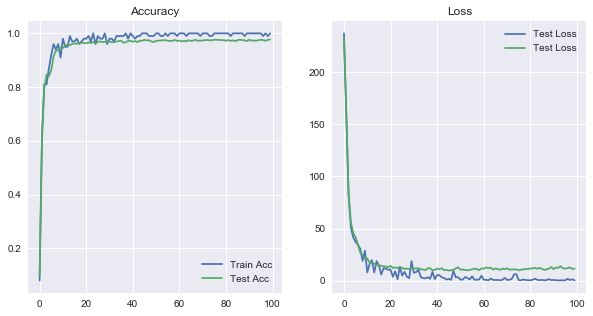

In [83]:
plt.figure(figsize=(10,5))

# Plot Accuracy
plt.subplot(1,2,1);
plt.plot(trainingAccuracyList, label="Train Acc");
plt.plot(testAccuracyList, label="Test Acc");
plt.title("Accuracy");
plt.legend();

# Plot Loss
plt.subplot(1,2,2);
plt.plot(trainingLossList, label="Test Loss");
plt.plot(testLossList, label="Test Loss");
plt.title("Loss");
plt.legend();

Daca ne uitam doar la capetele finale ale ploturilor : 

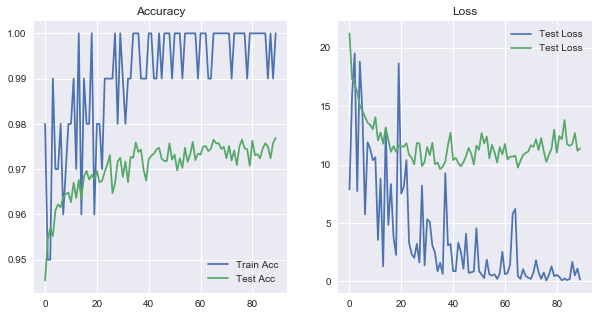

In [84]:
tailLength = -90

plt.figure(figsize=(10,5))

# Plot Accuracy
plt.subplot(1,2,1);
plt.plot(trainingAccuracyList[tailLength:], label="Train Acc");
plt.plot(testAccuracyList[tailLength:], label="Test Acc");
plt.title("Accuracy");
plt.legend();

# Plot Loss
plt.subplot(1,2,2);
plt.plot(trainingLossList[tailLength:], label="Test Loss");
plt.plot(testLossList[tailLength:], label="Test Loss");
plt.title("Loss");
plt.legend();

# Salvarea rezultatelor ca pickle

In [89]:
#from google.colab import files

resultsDic = {"trainAcc": trainingAccuracyList, "trainLoss": trainingLossList, "testAcc": testAccuracyList, "testLoss": testLossList}

with open("mnist-2.0-results.txt", "wb") as fp:   #Pickling
    pickle.dump(resultsDic, fp)
    
#files.download("mnist-2.0-results.txt")